In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('titanic/train.csv')    ## interesting not case sensitive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


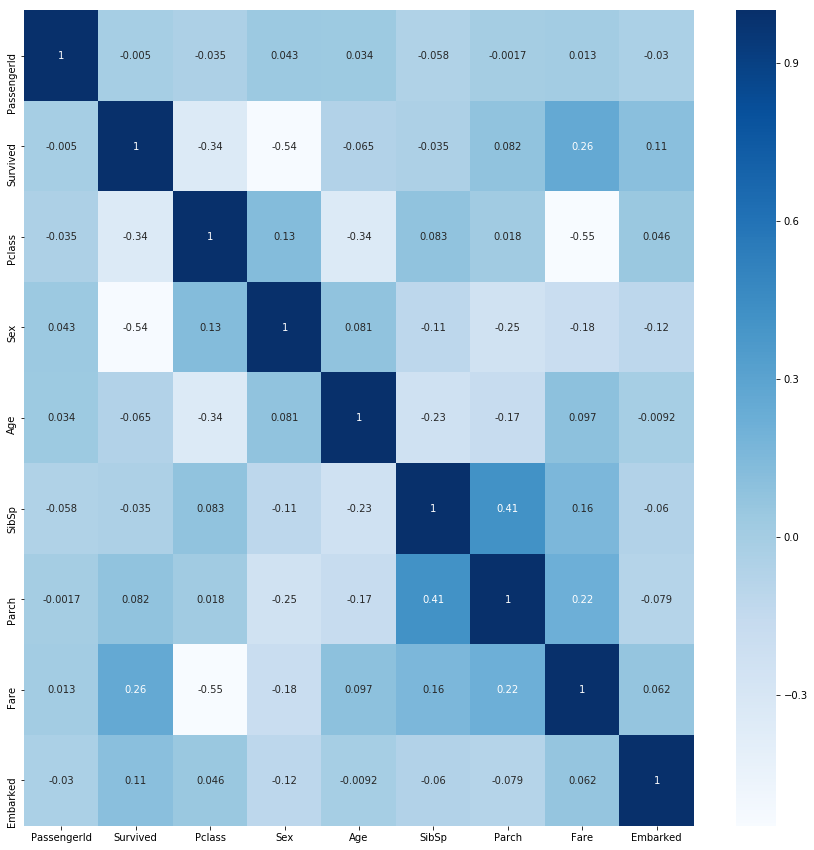

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Blues)

In [11]:
df['test'][df.Age<5]='Kids'
df[df.Age<5]

C:\Users\m118954.CORPAU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Kids
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,Kids
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Kids
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,Kids
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Kids
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Kids
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,Kids
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,Kids
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q,Kids
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,Kids


In [83]:
med = df['Age'].median()

In [84]:
df['Age'].fillna(value = med, inplace = True)

In [85]:
df[df.Embarked.isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [86]:
df['Embarked'].fillna(value = 'S', inplace = True)

In [87]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [88]:
df['Embarked'] = df['Embarked'].map({'S':1,'C':2,'Q':3})

In [89]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [12]:
x = ['Sex','Pclass','Embarked']
x = df[x]
y = df['Survived']

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75)

In [14]:
x_train.shape, x_test.shape

((668, 3), (223, 3))

In [15]:

# try a simple decision tree

from sklearn import tree
model = tree.DecisionTreeClassifier()

model = model.fit(x_train,y_train)

In [16]:
myprediction = model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
target_names = ['Died','Survived']

In [18]:
print(classification_report(y_test,myprediction,target_names = target_names))

              precision    recall  f1-score   support

        Died       0.78      0.93      0.85       133
    Survived       0.86      0.62      0.72        90

    accuracy                           0.81       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.82      0.81      0.80       223



In [43]:
# use SVM
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

In [44]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores

array([0.77037037, 0.81343284, 0.78947368, 0.82706767, 0.7593985 ])

In [46]:
clf = clf.fit(x_train,y_train)

In [47]:
myprediction = clf.predict(x_test)
print(classification_report(y_test,myprediction,target_names = target_names))

              precision    recall  f1-score   support

        Died       0.79      0.83      0.81       133
    Survived       0.73      0.68      0.71        90

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [42]:

total = df[['Sex','Survived']].groupby(['Sex']).count()
survived = df[['Sex','Survived']].groupby(['Sex']).sum()
mysum = pd.concat([total,survived],axis=1)
mysum.index.names = ['']
mysum.columns = ['Total','Survived']
mysum['Died'] = mysum.Total - mysum.Survived
mysum['Pctg'] = round(mysum.Survived/mysum.Total,2) * 100

In [20]:
mysum

,Total,Survived,Died,Pctg
,,,,
0,314,233,81,74.0
1,577,109,468,19.0


In [21]:
a = df[['Pclass','Survived']].groupby(['Pclass']).count()
b = df[['Pclass','Survived']].groupby(['Pclass']).sum()
tbl = pd.concat([a,b],axis=1)
tbl.columns = ['Total','Survived']
tbl['Died'] = tbl.Total - tbl.Survived
tbl['Pctg'] = round(tbl.Died/tbl.Total,2) * 100

In [22]:
total = df[['Pclass','Survived']].groupby(['Pclass']).count()
survived = df[['Pclass','Survived']].groupby(['Pclass']).sum()
mysum = pd.concat([total,survived],axis=1)
mysum.index.names = ['']
mysum.columns = ['Total','Survived']
mysum['Died'] = mysum.Total - mysum.Survived
mysum['Pctg'] = round(mysum.Survived/mysum.Total,2) * 100

In [23]:
mysum

,Total,Survived,Died,Pctg
,,,,
1,216,136,80,63.0
2,184,87,97,47.0
3,491,119,372,24.0


In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [25]:
j = pd.concat([a,b], axis=1)
j.columns = ['Total','Survived']

j

,Total,Survived
Pclass,,
1,216,136
2,184,87
3,491,119


In [ ]:
df['Sex'].value_counts(normalize=True)   ## normalise = true gives pctg

In [ ]:
# playing around with visualisation 

import seaborn as sb

sb.catplot(x='Pclass',y='Age',data=df)


In [ ]:
sb.boxplot(x='Pclass',y='Age',data=df)

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.67963393 0.27860919 0.04175689]


C:\Users\m118954.CORPAU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
x.head()

,Sex,Pclass,Embarked
0,1,3,1
1,0,1,2
2,0,3,1
3,0,1,1
4,1,3,1


In [78]:
# Create logistic regression object
rf = ensemble.RandomForestClassifier()
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'
n_estimators = [2, 5, 10, 15,30]
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'
min_samples_split  = [2, 5, 10]
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict(n_estimators = n_estimators, min_samples_split=min_samples_split)
# Fit your model using gridsearch
clf = GridSearchCV(rf, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x, y)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)
# You can also print the best penalty and C value individually from best_model.best_estimator_.get_params()
print('Best Min Sample Split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best N Estimator:', best_model.best_estimator_.get_params()['n_estimators'])

Best Parameters {'min_samples_split': 2, 'n_estimators': 5}
Best Min Sample Split: 2
Best N Estimator: 5


In [79]:
rf = ensemble.RandomForestClassifier(n_estimators=5, min_samples_split=2)
rf = rf.fit(x_train,y_train)
mypredict = rf.predict(x_test)

print(classification_report(mypredict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       158
           1       0.62      0.86      0.72        65

    accuracy                           0.81       223
   macro avg       0.78      0.82      0.79       223
weighted avg       0.84      0.81      0.81       223



In [61]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rf = ensemble.RandomForestClassifier()

In [53]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)